# Random Forest Classifier - College Football

In the past few months, I became pretty attentive towards college football. My alma matter, the Louisiana Ragin' Cajuns, has had it's highest rankings in program history. I wanted to look more into the data from college football teams and understand some of the data that is presented.

Through some of my research, a common focal point is the determination of how to handle different situations on the field. Since football has a high level of complexity and variability, utilizing previous data to inform of future decisions can be crucial towards game-planning.

In this program and any future programs, my focus is to understand some of these situations and understand how play calling can be more informed. 

My first program in this series is to create a Random Forest Classifier to look at some of the most important factors that are involved with passing, running, or punting the football when an offense is on the field. 

## Resources and Readings
For this program, I used the following resources:
1. [CollegeFootBallData.com](https://collegefootballdata.com/) This website has a constant running API that updates frequently.
2. [Applying Machine Learning to Predict BYU Football Play Success](https://towardsdatascience.com/applying-machine-learning-to-predict-byu-football-play-success-60b57267b78c) Chris Young and the rest of his team made an application to determine what the best play call is for offense, depending on the field situation. 
3. [Predicting Plays in the NFL](https://content.iospress.com/articles/journal-of-sports-analytics/jsa190348) The researchers in this paper developed a method to interpret when play calls should happen based on field situations. 

To start the program, I will be importing data from the 2018-2020 seasons. [If you are interested in importing data from the API,](https://gist.github.com/GJMcClintock/29330e26f674d4103c4f7080212a9208) click on the link.  

In [1]:
#libraries 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
import numpy as np 

After I load in the datasets and merge them into one dataframe, you can see the different categories used for statistics. We won't need all of this information for the random forest classification. Since I want to look only at offensive plays, I will filter out every type of play, listed under the category, 'play_type', that does not involve passing, running, or punting. 

In [2]:
#Load in dataframes by year

df1 = pd.read_csv(r'D:\Youtube\Data Analysis\Cajuns vs Chickens\CFB2018stats.csv')
df2 = pd.read_csv(r'D:\Youtube\Data Analysis\Cajuns vs Chickens\CFB2019stats.csv')
df3 = pd.read_csv(r'D:\Youtube\Data Analysis\Cajuns vs Chickens\CFB2020stats.csv')

#Merge the dataframes
frames = [df1, df2, df3]
df = pd.concat(frames)
df.filter(regex='^(?!NaN).+', axis=1)

,Unnamed: 0,away,clock,defense,defense_conference,defense_score,defense_timeouts,distance,down,drive_id,...,offense_timeouts,period,play_number,play_text,play_type,ppa,scoring,yard_line,yards_gained,yards_to_goal
0,0,Louisville,"{'minutes': 15, 'seconds': 0}",Alabama,SEC,0,3.0,10,1,4010122461,...,3.0,1,1,Evan O'Hara kickoff for 58 yds,Kickoff,NaN,False,65,0,65
1,1,Louisville,"{'minutes': 14, 'seconds': 25}",Louisville,ACC,0,3.0,10,1,4010122461,...,3.0,1,2,Damien Harris run for 3 yds to the Alab 38,Rush,-0.406231,False,35,3,65
2,2,Louisville,"{'minutes': 14, 'seconds': 10}",Louisville,ACC,0,3.0,7,2,4010122461,...,3.0,1,3,Tua Tagovailoa sacked by G.G. Robinson for a l...,Sack,-1.426442,False,38,-6,62
3,3,Louisville,"{'minutes': 13, 'seconds': 50}",Louisville,ACC,0,3.0,13,3,4010122461,...,3.0,1,4,Tua Tagovailoa pass complete to Damien Harris ...,Pass Reception,2.890492,False,32,14,68
4,4,Louisville,"{'minutes': 13, 'seconds': 25}",Louisville,ACC,0,3.0,10,1,4010122461,...,3.0,1,5,Tua Tagovailoa pass complete to Irv Smith Jr. ...,Pass Reception,0.646573,False,46,7,54
5,5,Louisville,"{'minutes': 12, 'seconds': 50}",Louisville,ACC,0,3.0,3,2,4010122461,...,3.0,1,6,Tua Tagovailoa pass complete to DeVonta Smith ...,Pass Reception,0.933877,False,53,28,47
6,6,Louisville,"{'minutes': 12, 'seconds': 25}",Louisville,ACC,0,3.0,10,1,4010122461,...,3.0,1,7,Tua Tagovailoa run for 8 yds to the Lvile 11,Rush,0.455350,False,81,8,19
7,7,Louisville,"{'minutes': 11, 'seconds': 55}",Louisville,ACC,0,3.0,2,2,4010122461,...,3.0,1,8,Tua Tagovailoa pass complete to Jerry Jeudy fo...,Passing Touchdown,2.149097,True,89,11,11
8,8,Louisville,"{'minutes': 11, 'seconds': 55}",Louisville,ACC,0,3.0,-13,2,4010122462,...,3.0,1,1,Joseph Bulovas kickoff for 50 yds for a touchback,Kickoff,NaN,False,50,0,50
9,9,Louisville,"{'minutes': 11, 'seconds': 46}",Alabama,SEC,7,3.0,10,1,4010122462,...,3.0,1,2,Jawon Pass pass complete to Micky Crum for 13 ...,Pass Reception,1.124751,False,75,13,75


In [4]:
#Filter out everything that isn't pass punt or rush and put into new dataframe
plays = ['Pass Reception',
         'Rush',
         'Pass Incompletion',
         'Passing Touchdown',
         'Rushing Touchdown',
         'Punt',
         'Pass Interception Return',
         'Interception Return Touchdown']

df_filter = df[df['play_type'].isin(plays)].copy()

In [5]:
df_filter.head()

,Unnamed: 0,away,clock,defense,defense_conference,defense_score,defense_timeouts,distance,down,drive_id,...,offense_timeouts,period,play_number,play_text,play_type,ppa,scoring,yard_line,yards_gained,yards_to_goal
1,1,Louisville,"{'minutes': 14, 'seconds': 25}",Louisville,ACC,0,3.0,10,1,4010122461,...,3.0,1,2,Damien Harris run for 3 yds to the Alab 38,Rush,-0.406231,False,35,3,65
3,3,Louisville,"{'minutes': 13, 'seconds': 50}",Louisville,ACC,0,3.0,13,3,4010122461,...,3.0,1,4,Tua Tagovailoa pass complete to Damien Harris ...,Pass Reception,2.890492,False,32,14,68
4,4,Louisville,"{'minutes': 13, 'seconds': 25}",Louisville,ACC,0,3.0,10,1,4010122461,...,3.0,1,5,Tua Tagovailoa pass complete to Irv Smith Jr. ...,Pass Reception,0.646573,False,46,7,54
5,5,Louisville,"{'minutes': 12, 'seconds': 50}",Louisville,ACC,0,3.0,3,2,4010122461,...,3.0,1,6,Tua Tagovailoa pass complete to DeVonta Smith ...,Pass Reception,0.933877,False,53,28,47
6,6,Louisville,"{'minutes': 12, 'seconds': 25}",Louisville,ACC,0,3.0,10,1,4010122461,...,3.0,1,7,Tua Tagovailoa run for 8 yds to the Lvile 11,Rush,0.455350,False,81,8,19


## Random Forests

Random Forests is an esemble method that uses a set of multiple learning or predictive algorithms that can better produce the accuracy of a model together than each individual algorithm. To build a classification model, a set of indpendent features and a specified output, or class, will need to be determined.

Since football has many individual factors that lead to a positive or negative impact to influence decision-making, a random forest classifier is a good way to highlight these factors. 

From the data given in the API, I specifically want to look at the following features:
- Down: The period in which a play happens. In football, offensively, teams are given 4 downs and must gain 10 yards or score, or else forefit possession to the opponent.  
- Distance: The distance remaining to reach the 10-yard increment.  
- [PPA](https://www.advancedfootballanalytics.com/index.php/home/stats/stats-explained/expected-points-and-epa-explained): Predicted points added, or expected points added, is a metric to determine the impact of the play on a score. It is used to calculate the value of each pass and run play.  
- Yards_Gained: The amount of yards gained per pass or run.  
- Yards_To_Goal: The remaining amount of yards to a touchdown.  

For the output, as mentioned in the introduction, I want to predict whether a pass, run, or punt occurs. 

To pass the data easily into the model, I will need to:
1. Extract the features from the dataframe.  
2. Extract the output and distinguish each part of the output from one another.  

The first part of the model is easy. Just make another dataframe with the columns of data we want to feature from the existing filtered dataframe.

To sort through the output, I define:
- Pass = 1  
- Rush = 2  
- Punt = 3  

I created flags to go through each play type, create a new column, 'play', and set numeric values for passing, rushing, and punting. Punts do not have PPA values, so to avoid any null arguments, I had to make PPA a neutral-impact value. In the case that a punt occurs, the PPA for that data entry is equal to 0. 

In [23]:
#Dependent - Pass, Punt, or Rush
#Need to define pass = 1, rush = 2, punt = 3
#Create flags to define pass rush or punt data
df_filter.loc[df_filter['play_type'].str.contains('Pass'), 'play'] = 1
df_filter.loc[df_filter['play_type'].str.contains('pass'), 'play'] = 1
df_filter.loc[df_filter['play_type'].str.contains('Interception'), 'play'] = 1
df_filter.loc[df_filter['play_type'].str.contains('Rush'), 'play'] = 2
df_filter.loc[df_filter['play_type'].str.contains('rush'), 'play'] = 2
df_filter.loc[df_filter['play_type'].str.contains('Punt'), 'play'] = 3
df_filter.loc[df_filter['play_type'].str.contains('punt'), 'play'] = 3

df_filter.loc[df_filter['play_type'].str.contains('Interception'), 'yards_gained'] = 0

flags_na = {'ppa': 0}
df_filter.fillna(value=flags_na,inplace=True)


#Define dependent variable
y = df_filter['play'].values

#Convert dataframe to integer
y = y.astype('int')

#Define independent variables
feature_cols = ['down', 'distance', 'ppa', 'yards_gained', 'yards_to_goal']
x = df_filter[feature_cols]

## Random Forest Model Creation

Next, I create the model for the random forest. I split the data into 80% training and 20% testing. I set the number of estimators, or number of trees, for the model to equal 10 and I set the random state to randomize 20 entries. 

In [24]:
#Create training and testing set (80/20)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .2, random_state = 20)

#Define Random Forest Model
model = RandomForestClassifier(n_estimators = 10, random_state = 20)
model.fit(xtrain, ytrain)
prediction_test = model.predict(xtest)

print("Accuracy = ", metrics.accuracy_score(ytest, prediction_test))

Accuracy =  0.7462375513061186


The model's accuracy is 74.6%. To show what features are most important to the model, the following code is run.

In [25]:
feature_list = list(x.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

yards_gained     0.328378
ppa              0.261204
down             0.197192
yards_to_goal    0.131444
distance         0.081782
dtype: float64


To better visualize this information, a bar chart is made in matplot lib.

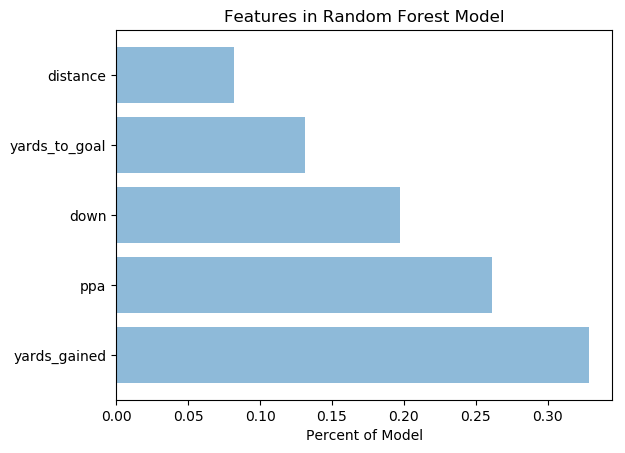

In [35]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = feature_imp.index
y_pos = objects
performance = feature_imp

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Percent of Model')
plt.title('Features in Random Forest Model')

plt.show()

From looking at the model, yards_gained and PPA are the largest indicators of passing or running. A futher test into whether passing yards or running yards are more prevalent would need to be conducted for future testing. 

For punting, which occurs on 4th down, would affect the accuracy of the model. 

I think this model can be improved on through more specifications to distinguish passing and running futher, which I may come back towards in a future program. 

## Conclusion

While the accuracy of the model is around 75%, adding more features to the model, such as the opponent's defensive scheme, may help with it's accuracy. Since random forests can be viewed in terms of its inputs and outputs, and not each individual interal function or relationship, in a game like football, would having more control over the inputs would be better in the long term? For example, if I wanted to look at historical 4th down situations, would I be able to classify what's the better option to run or pass the football? In the future, I want to go more in depth and try to answer questions like this. 